# Visualizing Loans Awarded by Kiva

In this project you'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, you'll explore the average loan amount by country using aggregated bar charts. You'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.

Some of the steps below will have  hints that you can access if you need them. Hints will look like this:
<br>
<br>
<details>
<summary>Hint (click me)</summary>
<br>
I'm a hint!
<br>
</details>

**A Note On `plt.show()`:** You may be used to displaying your plots using the code `plt.show()`. This IPython Jupyter notebook removes the necessity of calling `plt.show()` after each plot. You should be able to render your Seaborn plots simply by running the cell with the code for your plot. If you have issues rendering your plot you can try adding `plt.show()` to a cell.

## Step 1: Import Necessary Python Modules
Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('kiva_data.csv')


## Step 3: Examine The Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project download folder.

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 


Print the first 25 rows of `df` using `.head()`

In [44]:
df.head(25)


,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loan_amount  65499 non-null  int64 
 1   activity     65499 non-null  object
 2   country      65499 non-null  object
 3   gender       65499 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [91]:
df['activity'].unique()

array(['Food Production/Sales', 'General Store', 'Farming'], dtype=object)

## Step 4: Bar Charts

Create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

We've set up the figure you'll use to plot your bar plot on. The `f` variable gives us access to the figure and `ax` gives us access to the axes.

Use `sns.barplot()` with the following arguments:

- `data` set to `df`
- `x` set to `country`
- `y` set to `loan_amount`

<AxesSubplot:xlabel='country', ylabel='loan_amount'>

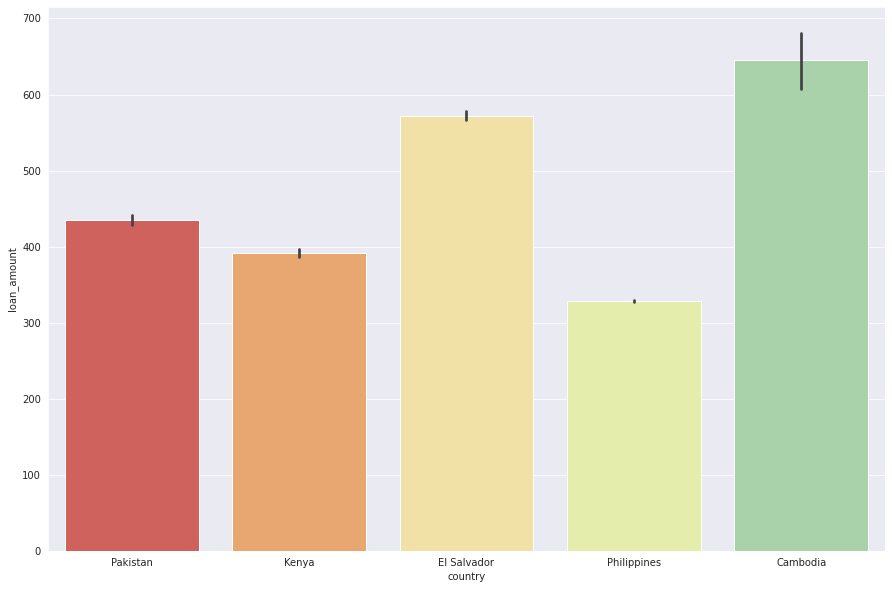

In [112]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data = df, x = 'country', y = 'loan_amount')

### Adding `$` units

You can use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

Run the code in the cell below to see the `$` in action.

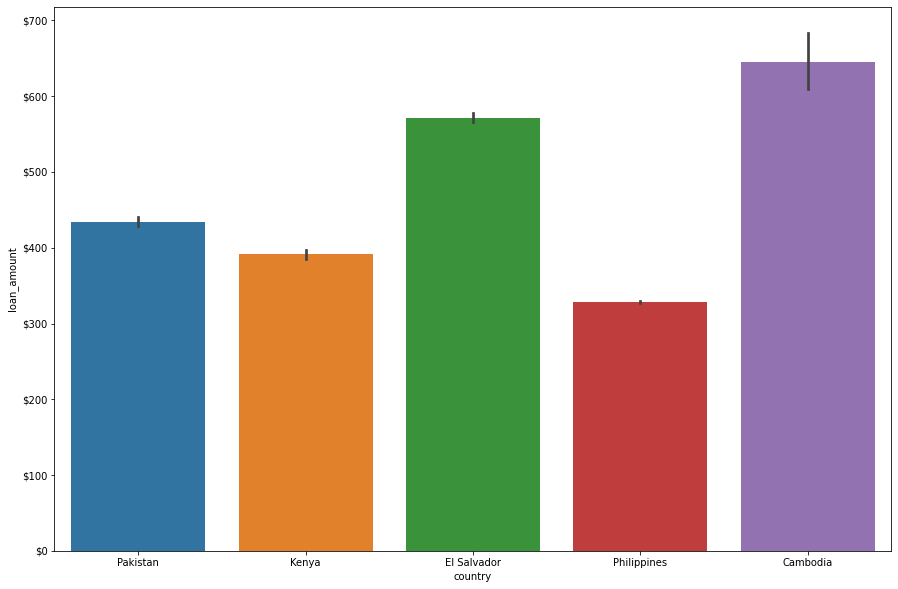

In [13]:
import matplotlib.ticker as mtick

# Creates the figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the data
sns.barplot(data=df, x="country", y = "loan_amount")

# Use part of the code above to format the y-axis ticks below this line
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)



## Step 5: Learn More By Using `hue` In Your Visualization

You can visualize even more data on one bar plot by visualizing the loan amount by country, and "nesting" by gender. Add the `hue` parameter to your `sns.barplot()` and set it so that the visualization includes the nested category of gender.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
Set `hue` equal to the column name `gender`.
<br>
</details>

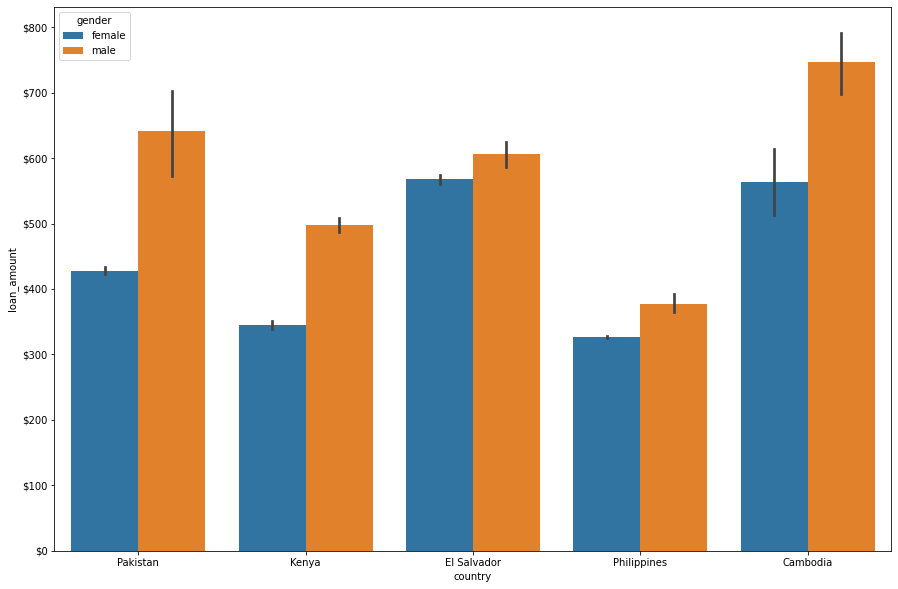

In [14]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x="country", y="loan_amount", hue= 'gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

<AxesSubplot:xlabel='country', ylabel='loan_amount'>

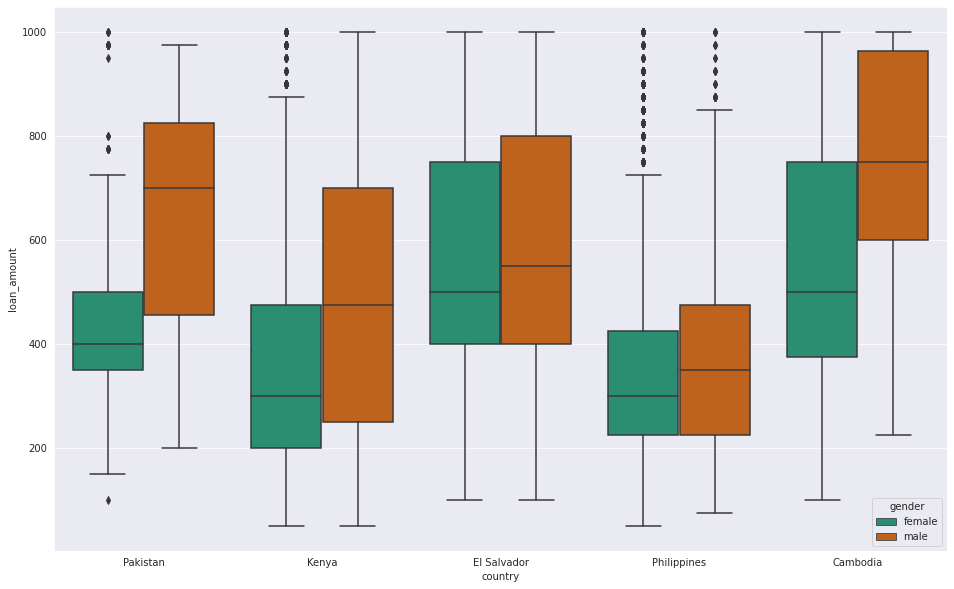

In [29]:
plt.figure(figsize=(16, 10))
sns.boxplot(x = 'country', y = 'loan_amount', data = df, hue = 'gender')

#### Reflection Questions

On average, do female or male recipients receive larger loans from Kiva?

In [6]:
df_fem = df[df['gender'] == 'female']
df_male = df[df['gender'] == 'male']
df_fem_sum = np.sum(df_fem['loan_amount'])
df_male_sum = np.sum(df_male['loan_amount'])
df_sum = np.sum(df['loan_amount'])

In [22]:
female_per = df_fem_sum / df_sum * 100
male_per = df_male_sum / df_sum * 100 

In [24]:
print(female_per, male_per)

91.89803356170094 8.101966438299053


In [25]:
print(len(df_fem), len(df_male))

61632 3867


In [16]:
def max_count(country):
    df_male_country = df_male[df_male['country'] == country]
    df_fem_country = df_fem[df_fem['country'] == country]
    max_male = np.max(df_male_country['loan_amount'])
    max_female = np.max(df_fem_country['loan_amount'])
    mean_male = np.mean(df_male_country['loan_amount'])
    mean_female = np.mean(df_fem_country['loan_amount'])
    print(f"counts of male: {len(df_male_country)} and counts of female: {len(df_fem_country)}")
    print(f"Max value for male: {max_male}")
    print(f"Max value for female: {max_female}")
    print(f"mean value for male {mean_male}")
    print(f"mean value for female {mean_female}")                 
    return [max_male, mean_male, max_female, mean_female]
    
    
    

Which country has the *least* disparity in loan amounts awarded by gender?

In [17]:
max_count('Pakistan')

counts of male: 54 and counts of female: 1732
Max value for male: 975
Max value for female: 1000
mean value for male 642.1296296296297
mean value for female 427.9878752886836


[975, 642.1296296296297, 1000, 427.9878752886836]

In [10]:
max_count('Kenya')

counts of male: 2157 and counts of female: 4943
Max value for male: 1000
Max value for female: 1000
mean value for male 497.68196569309225
mean value for female 345.0283228808416


[1000, 497.68196569309225, 1000, 345.0283228808416]

In [51]:
max_count('El Salvador')

counts of male: 692 and counts of female: 5480
Max value for male: 1000
Max value for female: 1000
mean value for male 605.599710982659
mean value for female 567.4543795620438


[1000, 605.599710982659, 1000, 567.4543795620438]

Based on the data, what kind of recommendations can you make to Kiva about the loans they give?

Kiva must decreas the gender loan, especialy in Pakistan, Kenya, Cambodia 

What actions could be taken to implement the recommendations you've made?

Kiva must have some women-led project, because women are main client, but they can take a loan for much less then a man 

## Step 6: Styling


Set a different color palette using `sns.set_palette()`. You can use any of the Color Brewer qualitative color palettes:

- Set1
- Set2
- Set3
- Pastel1
- Pastel2
- Dark2
- Accent

You can read more about <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes" target = "_blank">qualitative color palettes in the Seaborn documentation.</a>


Set the plot background style using `sns.set_style()`. You can experiment with:
- whitegrid
- darkgrid
- white
- dark

Set the title using `ax.set_title("")`.


<AxesSubplot:title={'center':'Pakistan activity'}, xlabel='activity', ylabel='loan_amount'>

<Figure size 1800x1080 with 0 Axes>

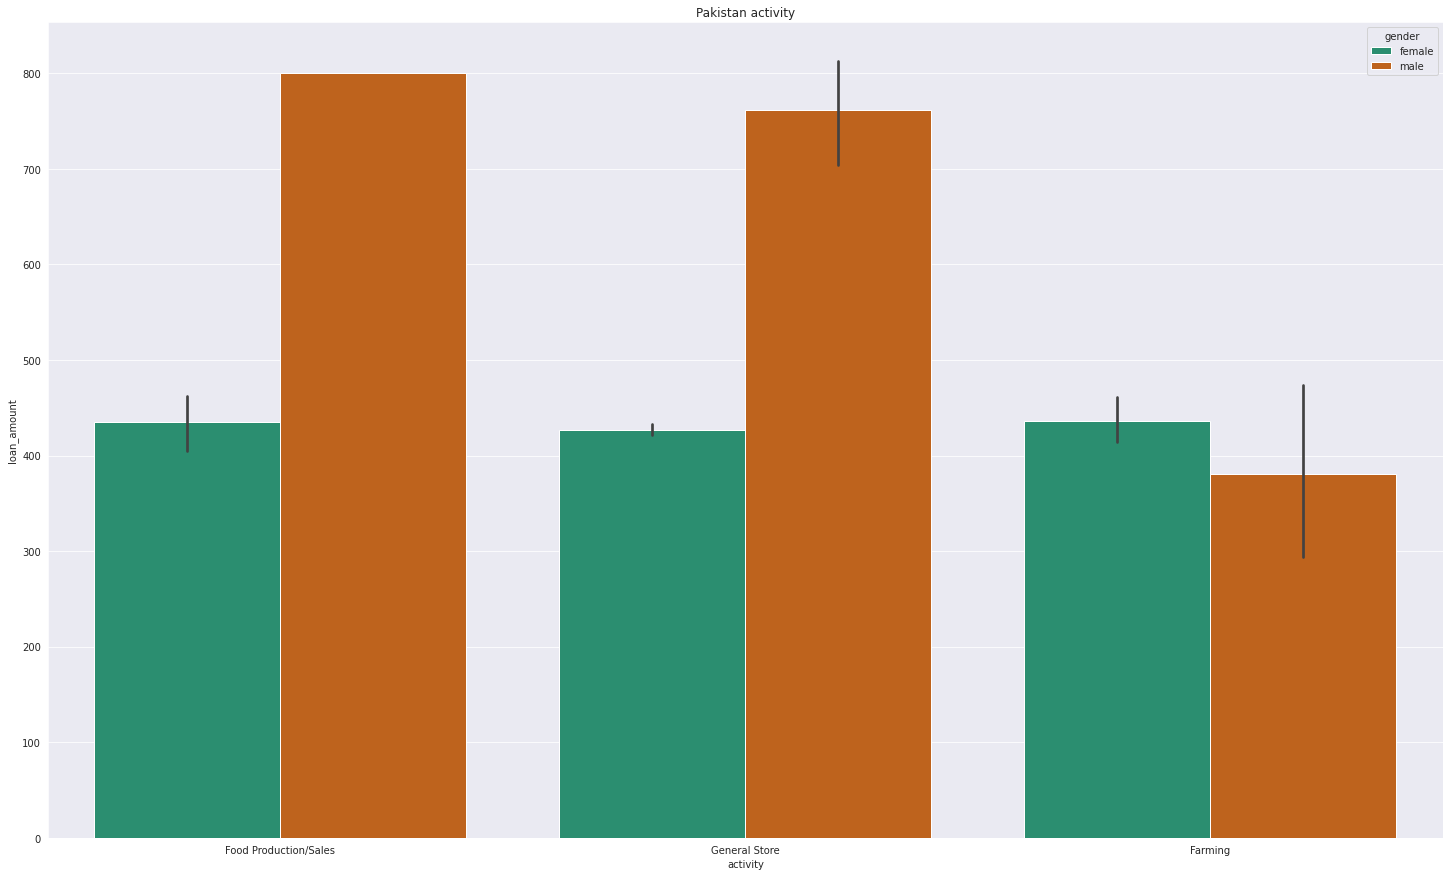

In [44]:
# Set color palette

sns.set_palette('Dark2')
# Set style

sns.set_style('darkgrid')
# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
f, ax = plt.subplots(figsize=(25, 15))
# Add a title
ax.set_title('Pakistan activity')

# Use Seaborn to create the bar plot
sns.barplot(data = df[df['country']=='Pakistan'], x = 'activity', y = 'loan_amount', hue = 'gender')


<AxesSubplot:title={'center':'Kenya activity'}, xlabel='activity', ylabel='loan_amount'>

<Figure size 1800x1080 with 0 Axes>

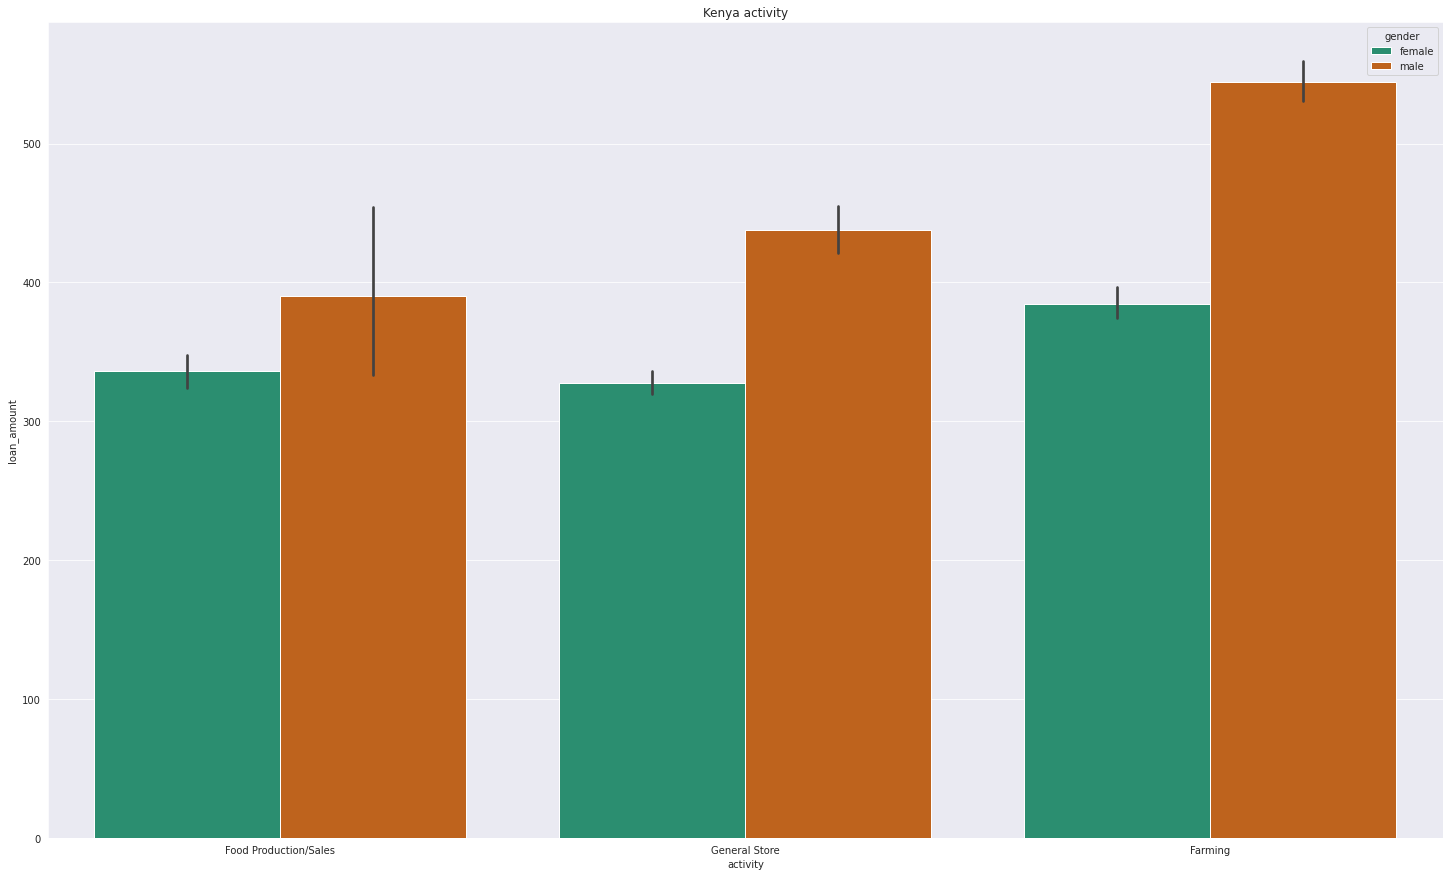

In [45]:
# Set color palette

sns.set_palette('Dark2')
# Set style

sns.set_style('darkgrid')
# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
f, ax = plt.subplots(figsize=(25, 15))
# Add a title
ax.set_title('Kenya activity')

# Use Seaborn to create the bar plot
sns.barplot(data = df[df['country']=='Kenya'], x = 'activity', y = 'loan_amount', hue = 'gender')


<AxesSubplot:title={'center':'El Salvador'}, xlabel='activity', ylabel='loan_amount'>

<Figure size 1800x1080 with 0 Axes>

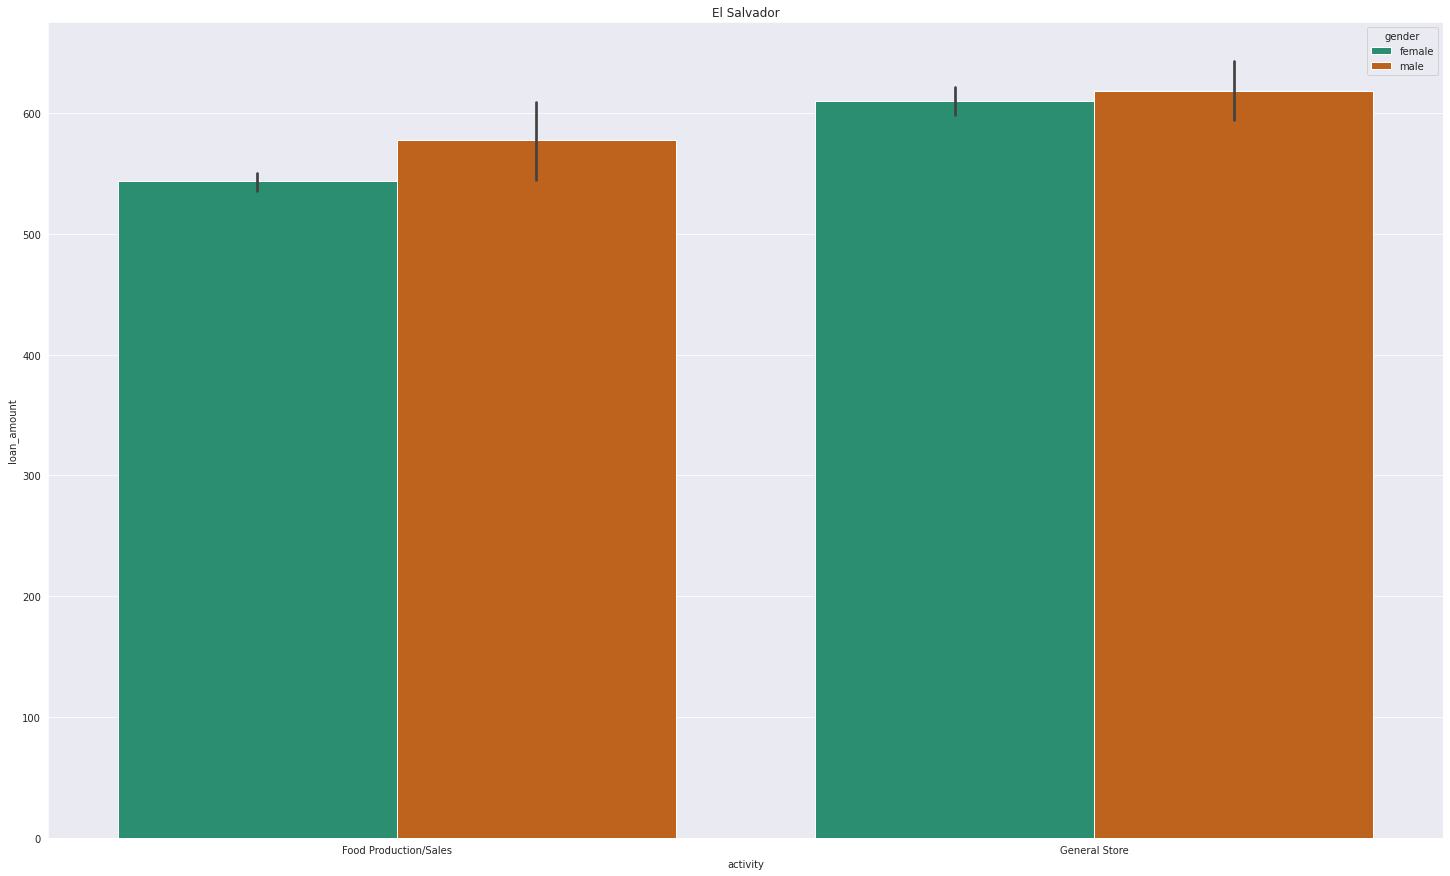

In [66]:
# Set color palette

sns.set_palette('Dark2')
# Set style

sns.set_style('darkgrid')
# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
f, ax = plt.subplots(figsize=(25, 15))
# Add a title
ax.set_title('El Salvador')

# Use Seaborn to create the bar plot
sns.barplot(data = df[df['country']=='El Salvador'], x = 'activity', y = 'loan_amount', hue = 'gender')


<AxesSubplot:title={'center':'Philippines'}, xlabel='activity', ylabel='loan_amount'>

<Figure size 1800x1080 with 0 Axes>

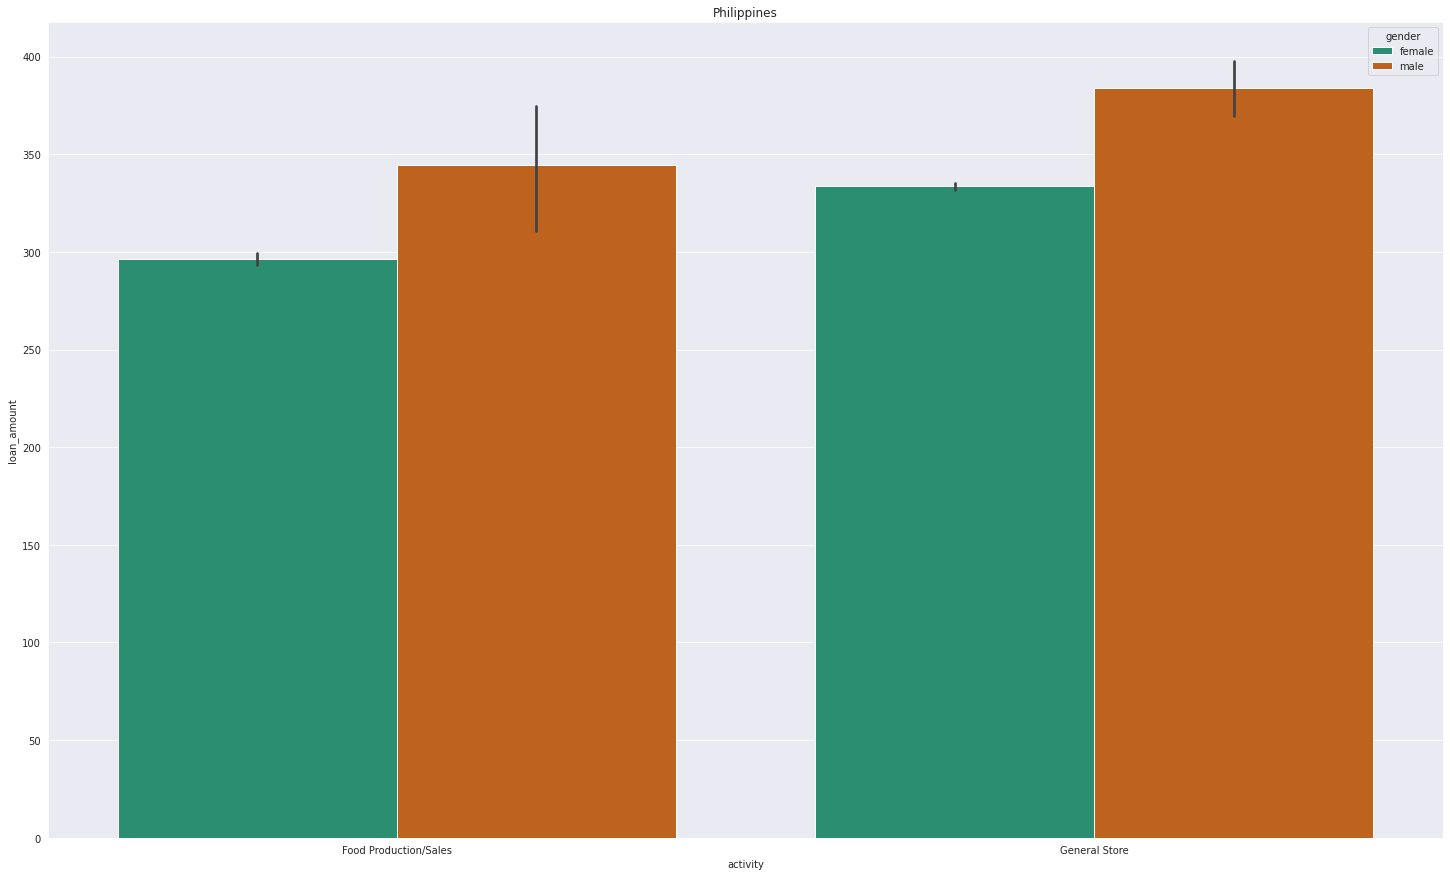

In [55]:
# Set color palette

sns.set_palette('Dark2')
# Set style

sns.set_style('darkgrid')
# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
f, ax = plt.subplots(figsize=(25, 15))
# Add a title
ax.set_title('Philippines')

# Use Seaborn to create the bar plot
sns.barplot(data = df[df['country']=='Philippines'], x = 'activity', y = 'loan_amount', hue = 'gender')


<AxesSubplot:title={'center':'Cambodia'}, xlabel='activity', ylabel='loan_amount'>

<Figure size 1800x1080 with 0 Axes>

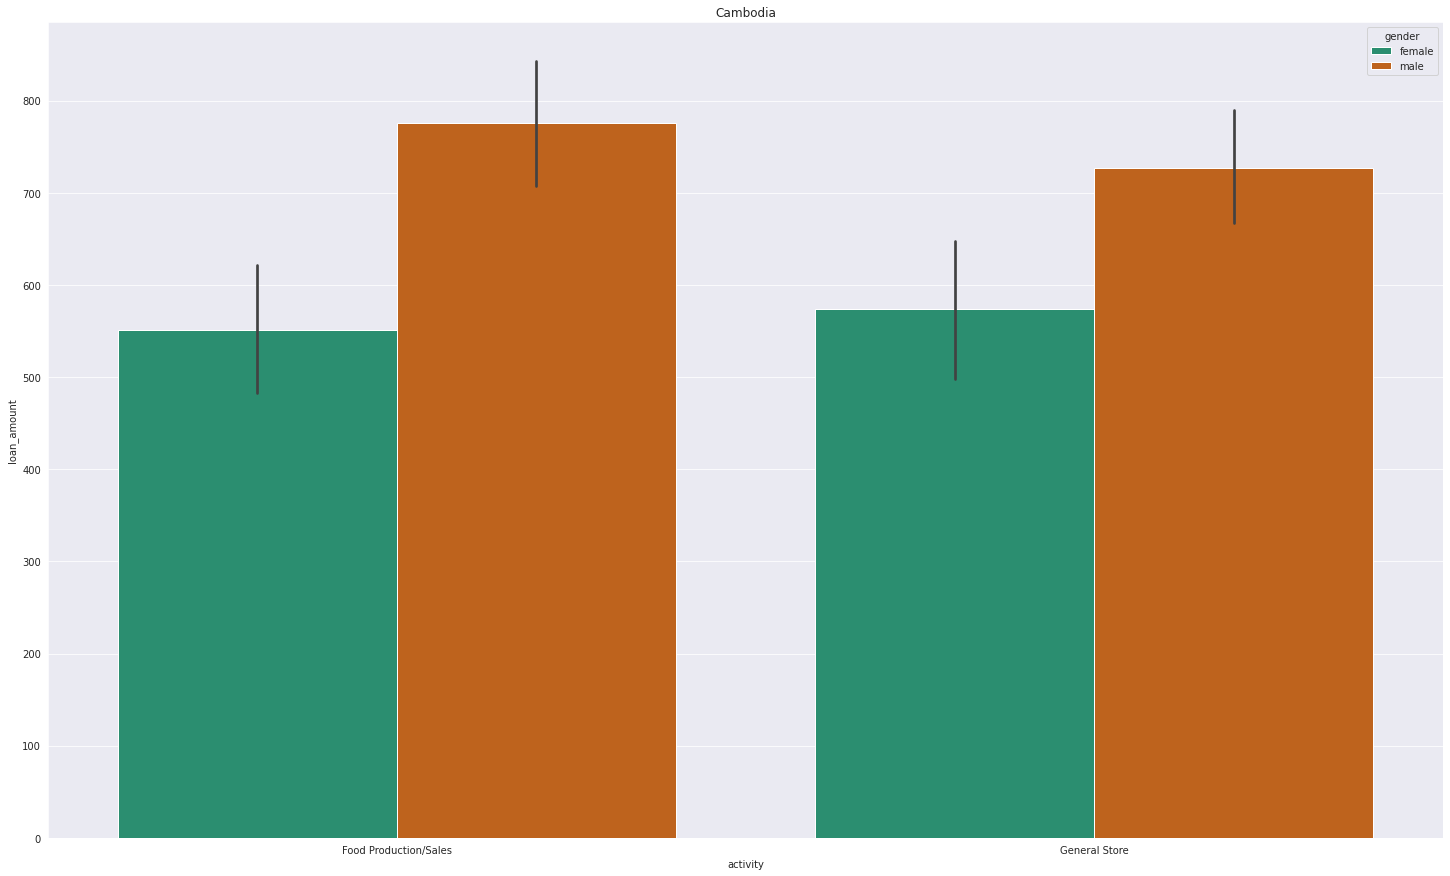

In [57]:
# Set color palette

sns.set_palette('Dark2')
# Set style

sns.set_style('darkgrid')
# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
f, ax = plt.subplots(figsize=(25, 15))
# Add a title
ax.set_title('Cambodia')

# Use Seaborn to create the bar plot
sns.barplot(data = df[df['country']=='Cambodia'], x = 'activity', y = 'loan_amount', hue = 'gender')


## Step 7: Box Plots With Kiva Data

So far you have visualized the average size of loans by country using bar charts; now you are going to make a box plot to compare the distribution of loans by country.

We have set up a figure for you to plot on. Use `sns.boxplot()` to compare the distribution of loan amounts by country for the Kiva dataset.   

`sns.boxplot()` can be passed the same parameters as `sns.barplot()`.

**Optional:** You may set a new color palette if you would like to continue using `sns.set_palette()`.


<AxesSubplot:title={'center':'Pakistan'}, xlabel='activity', ylabel='loan_amount'>

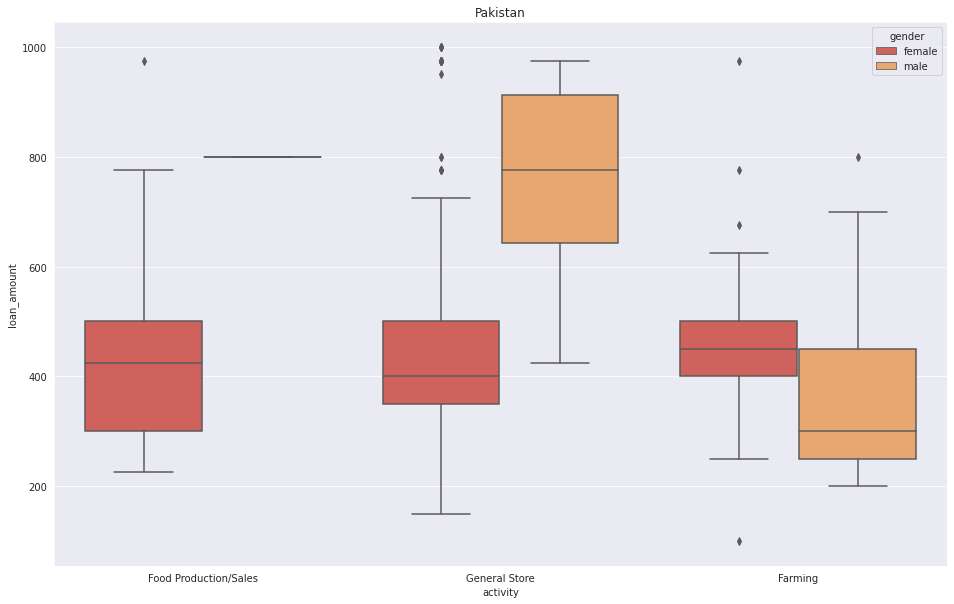

In [83]:
plt.figure(figsize=(16, 10))
plt.title('Pakistan')
sns.boxplot(x = 'activity', y = 'loan_amount', data = df[df['country'] == 'Pakistan'], hue = 'gender')




<AxesSubplot:title={'center':'Kenya'}, xlabel='activity', ylabel='loan_amount'>

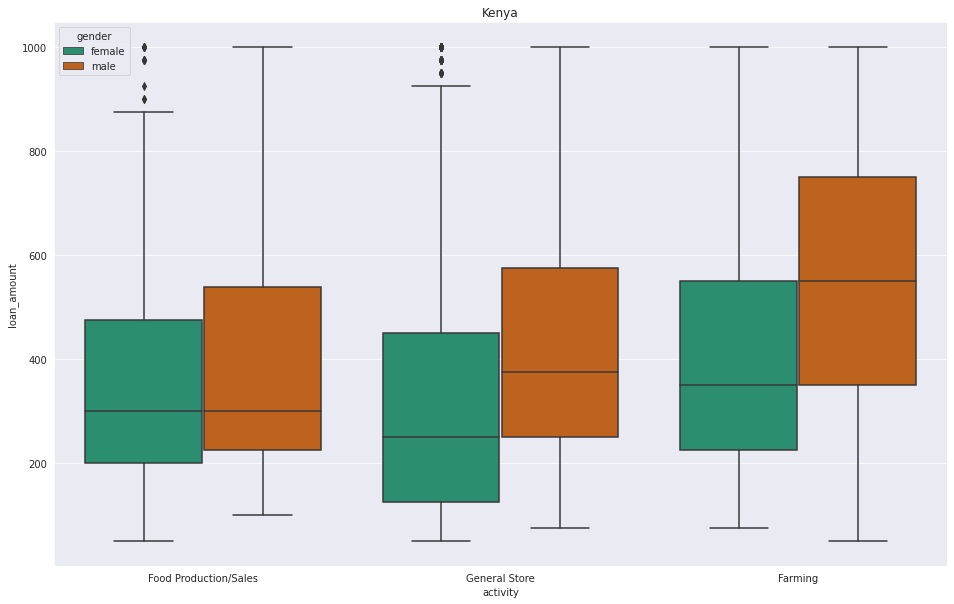

In [59]:
plt.figure(figsize=(16, 10))
plt.title('Kenya')
sns.boxplot(x = 'activity', y = 'loan_amount', data = df[df['country'] == 'Kenya'], hue = 'gender')




<AxesSubplot:title={'center':'El Salvador'}, xlabel='activity', ylabel='loan_amount'>

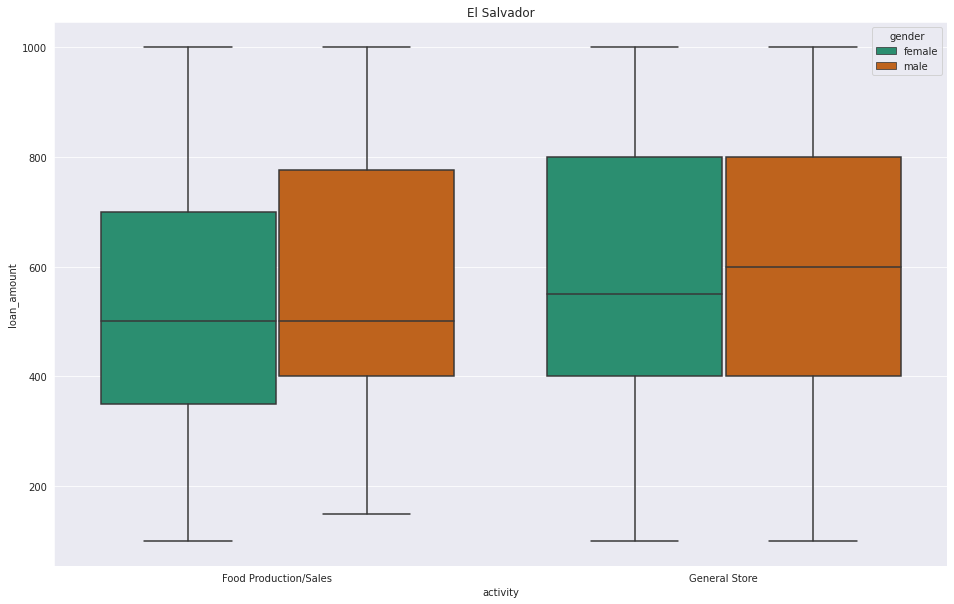

In [60]:
plt.figure(figsize=(16, 10))
plt.title('El Salvador')
sns.boxplot(x = 'activity', y = 'loan_amount', data = df[df['country'] == 'El Salvador'], hue = 'gender')

<AxesSubplot:title={'center':'Philippines'}, xlabel='activity', ylabel='loan_amount'>

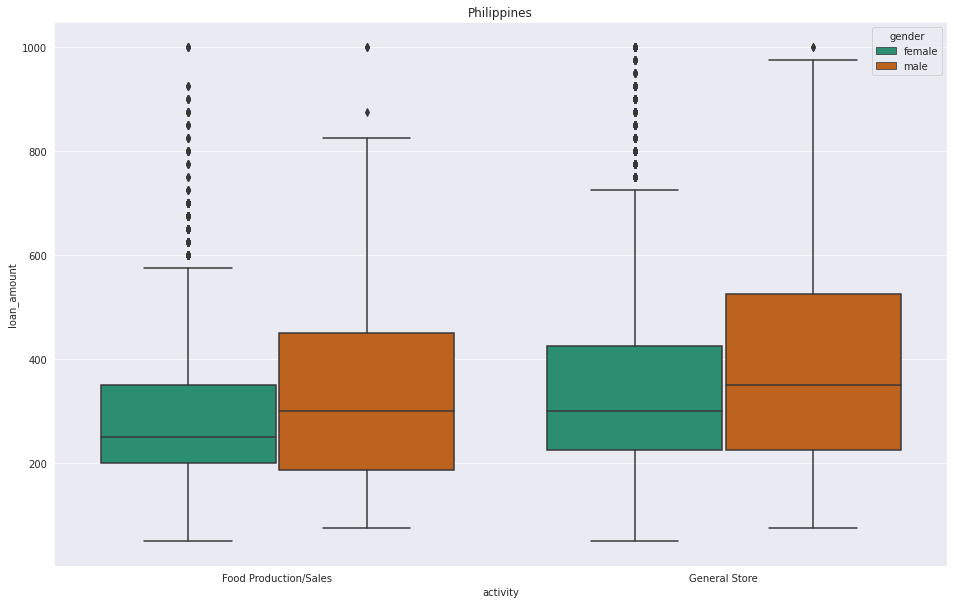

In [63]:
plt.figure(figsize=(16, 10))
plt.title('Philippines')
sns.boxplot(x = 'activity', y = 'loan_amount', data = df[df['country'] == 'Philippines'], hue = 'gender')

<AxesSubplot:title={'center':'Cambodia'}, xlabel='activity', ylabel='loan_amount'>

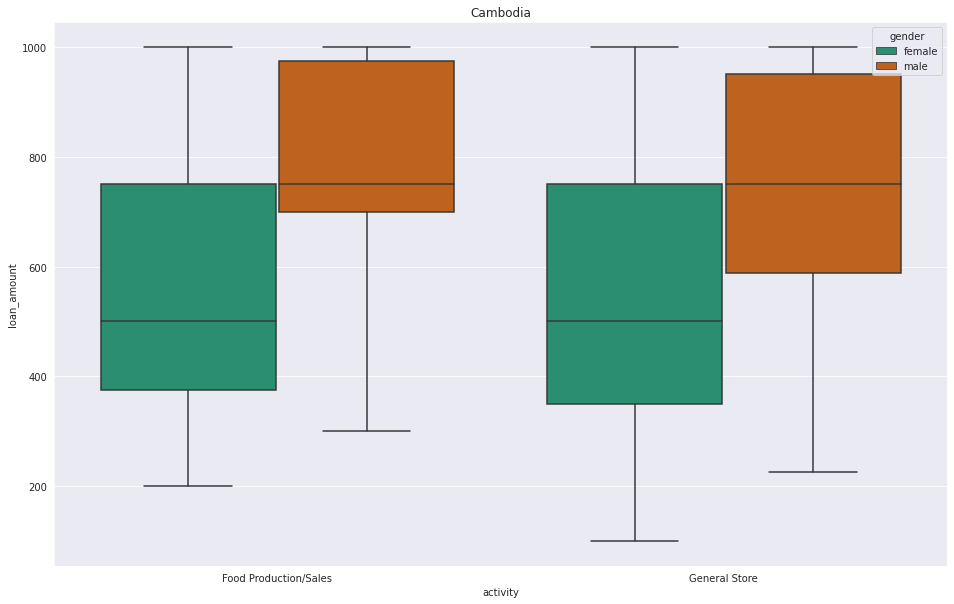

In [67]:
plt.figure(figsize=(16, 10))
plt.title('Cambodia')
sns.boxplot(x = 'activity', y = 'loan_amount', data = df[df['country'] == 'Cambodia'], hue = 'gender')

Instead of visualizing the loan amount by *country*, use `sns.boxplot()` to plot the loan amount by *activity*.
<br>
<br>
<details>
<summary>Hint</summary>
<br>
You can use the same code as the box plot above, but the `x` parameter should be set to `"activity"`.
<br>
</details>
 
**Optional:** Set a different plot style and color palette to best visualize this data.

In [ ]:
plt.figure(figsize=(16, 10))




#### Reflection Questions

What does this visualization reveal that previous ones did not?

## Step 9: Violin Plots

You can use nearly identical syntax (as you have used for box plots) to create violin plots. Take this line of code from above:

```python
sns.boxplot(data=df, x="activity", y="loan_amount")
```

To visualize the distribution of the exact same data as a violin plot you could pass the same parameters to `sns.violinplot()` instead of `sns.boxplot()`.

Change the code in the cell below so that the data is plotted as a violin plot instead of a barplot.

<AxesSubplot:xlabel='activity', ylabel='loan_amount'>

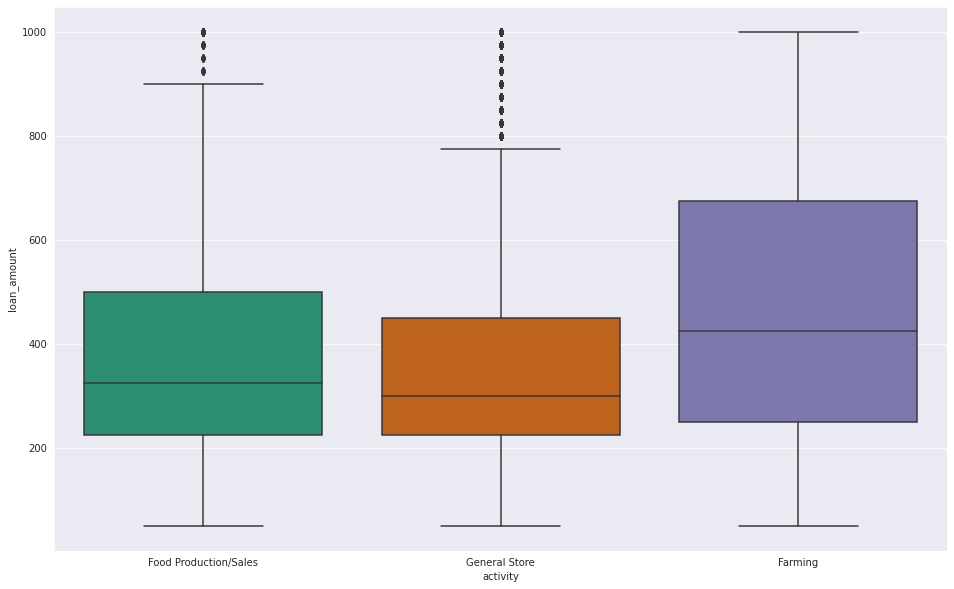

In [64]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=df, x="activity", y="loan_amount")

### Create a violin plot that visualizes the distribution of loan amount by country.
Previously, you created a violin plot and plotted the data by _activity_. This time, create a violin plot that plots the data by _country_.

<br>
<details>
<summary>Hint</summary>
<br>
Change the value of the `x` argument passed into the `violinplot()` function.
<br>
</details>

In [ ]:
plt.figure(figsize=(16, 10))

## Step 10: Split Violin Plots

Use the `hue` and `split` parameters with `sns.violinplot()` to visualize the distribution of loan amount by country, split by gender. 

<br>
<details>
<summary>Hint</summary>
<br>
The argument `hue` should be set to `"gender"` and `split` should equal `True`. 
<br>
</details>

<AxesSubplot:xlabel='activity', ylabel='loan_amount'>

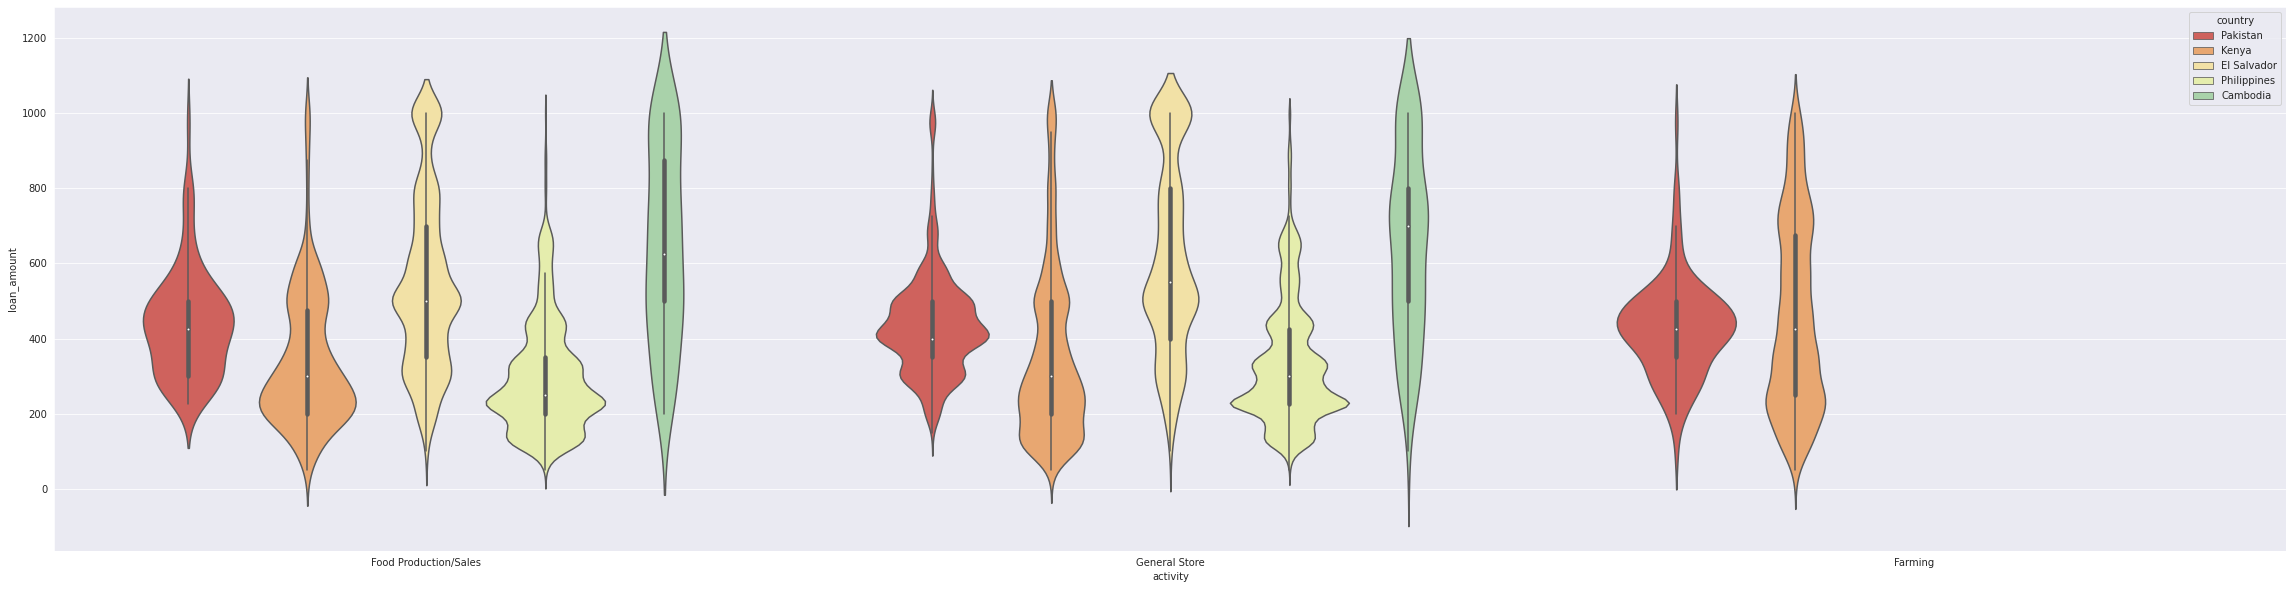

In [76]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")
plt.figure(figsize=(40, 10))
sns.violinplot(data=df, x="activity", y="loan_amount", hue='country')

<AxesSubplot:title={'center':'Kenya'}, xlabel='activity', ylabel='loan_amount'>

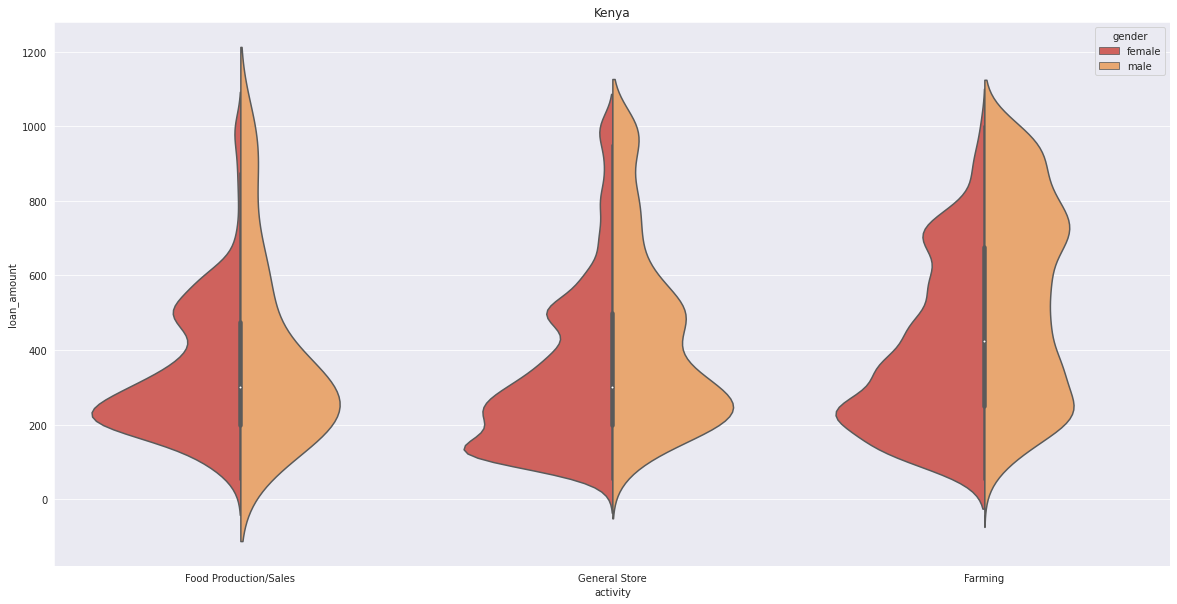

In [80]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")

plt.figure(figsize=(20, 10))
plt.title('Kenya')
sns.violinplot(data=df[df['country'] == 'Kenya' ], x="activity", y="loan_amount", hue='gender', split = True)

<AxesSubplot:title={'center':'El Salvador'}, xlabel='activity', ylabel='loan_amount'>

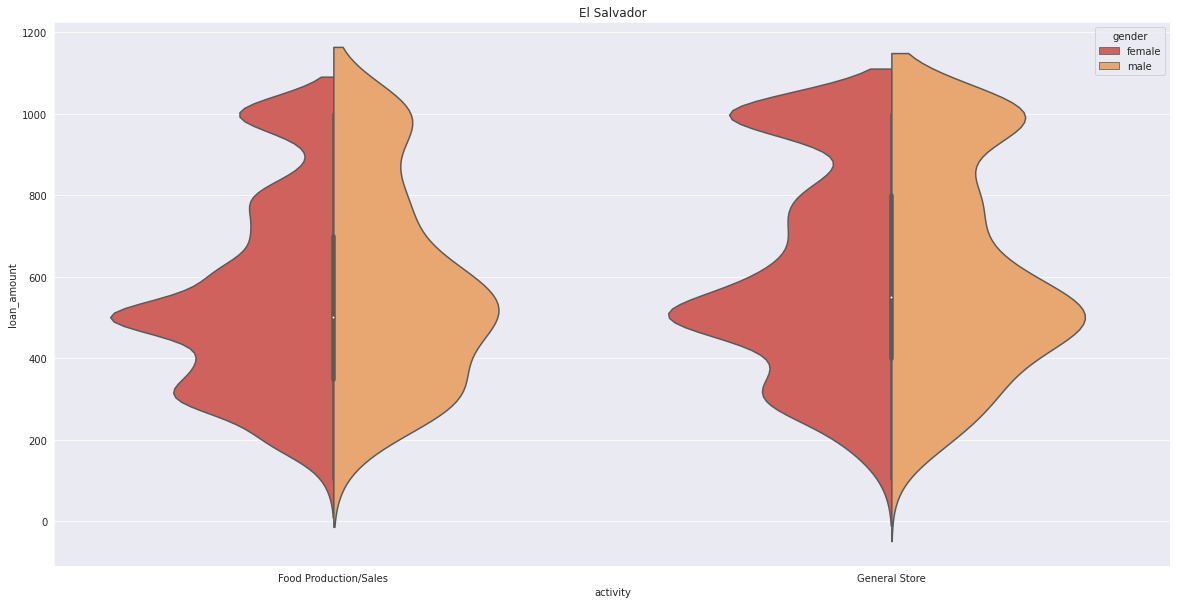

In [81]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")

plt.figure(figsize=(20, 10))
plt.title('El Salvador')
sns.violinplot(data=df[df['country'] == 'El Salvador' ], x="activity", y="loan_amount", hue='gender', split = True)

<AxesSubplot:title={'center':'Pakistan'}, xlabel='activity', ylabel='loan_amount'>

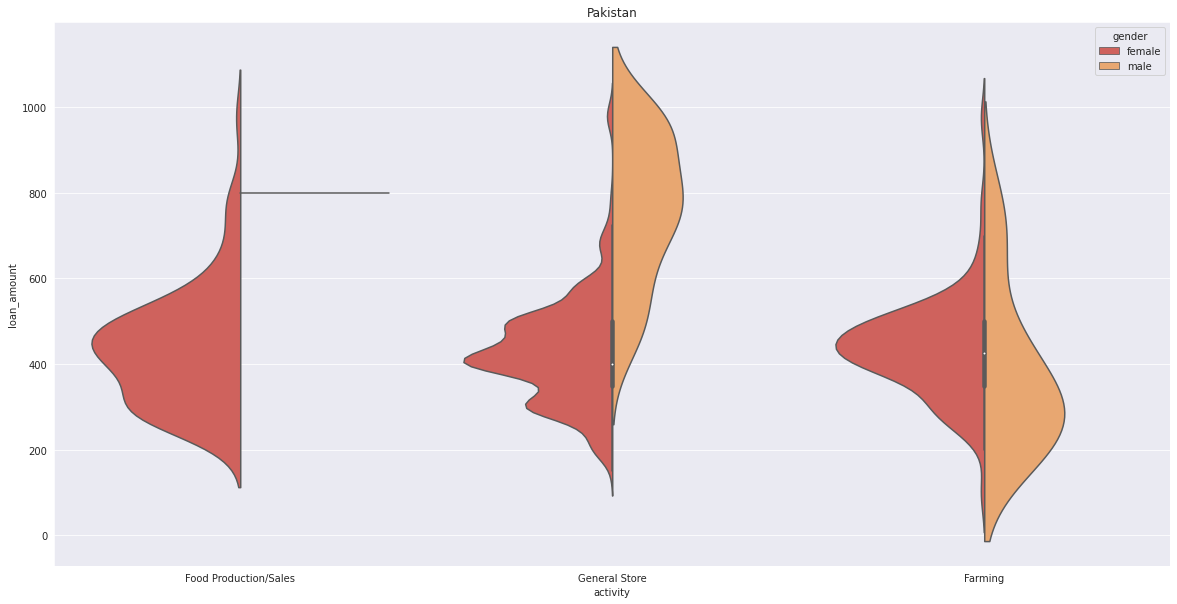

In [82]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")

plt.figure(figsize=(20, 10))
plt.title('Pakistan')
sns.violinplot(data=df[df['country'] == 'Pakistan' ], x="activity", y="loan_amount", hue='gender', split = True)

<AxesSubplot:title={'center':'Philippines'}, xlabel='activity', ylabel='loan_amount'>

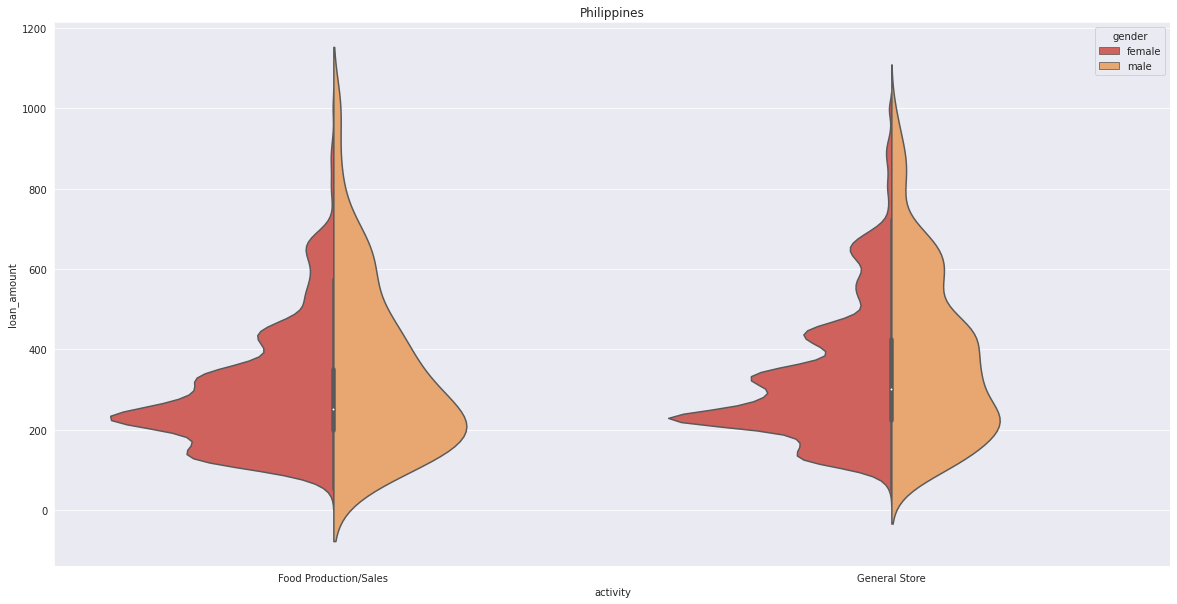

In [ ]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")

plt.figure(figsize=(20, 10))
plt.title('Philippines')
sns.violinplot(data=df[df['country'] == 'Philippines' ], x="activity", y="loan_amount", hue='gender', split = True)

<AxesSubplot:title={'center':'Cambodia'}, xlabel='activity', ylabel='loan_amount'>

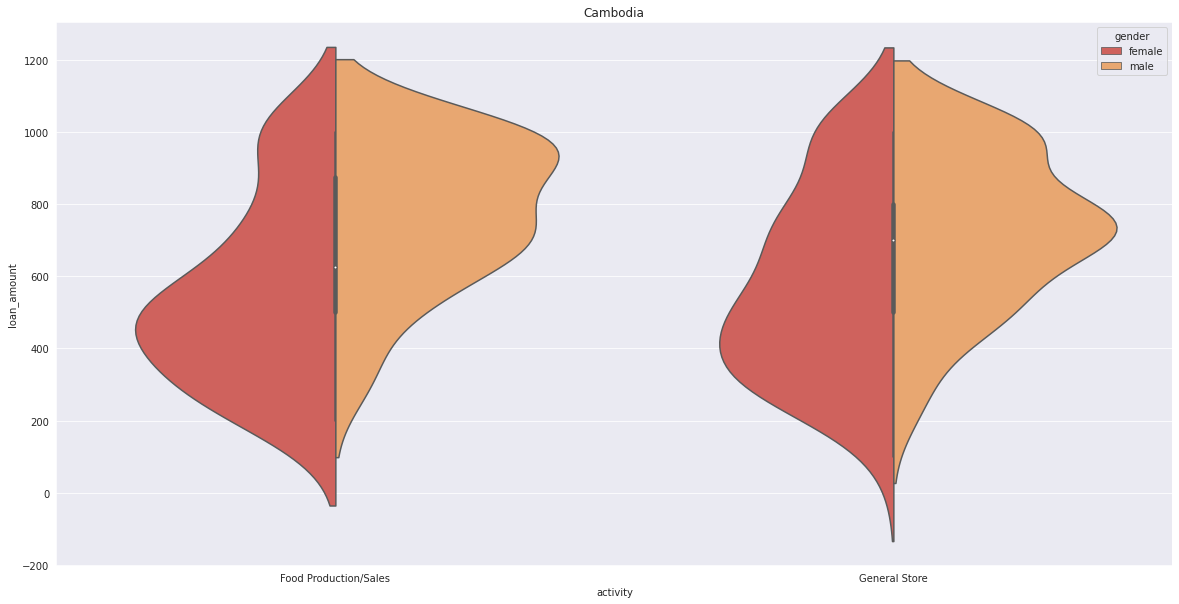

In [88]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")

plt.figure(figsize=(20, 10))
plt.title('Cambodia')
sns.violinplot(data=df[df['country'] == 'Cambodia' ], x="activity", y="loan_amount", hue='gender', split = True)

## Промежуточный вывод:

из всех графиков видно, что мужское население всех стран получает гораздо большие суммы кредитов в сравнении с женским налением.
Стоит отметить, что в общем количестве женщины берут кредиты чаще  мужчин, что наталкивает на необходимость повышения кредитных возможностей женщин.
Стоит обратить внимание на то, что фермерское хозяйство задействовано тольео в таких странах, как Пакистан и Кения, соответственно есть смысл провести проекты по популяризации данного направления в иных странах.
Также необходимо провести проекты направленные на женское население и провезти дополнительный анализ в возможностях их выплат более больших сумм кредитов.

Отдельного внимания заслуживают:
    Филиппины, где ярко выражены выбросы в суммах кредитования для женщин.
    Пакистан, где в области продаж у мужчин замечены аномалии в кредитовании.

In [107]:
len_pakistan_male_sales = df.query("(country == 'Pakistan')and (activity == 'Food Production/Sales')and (gender == 'male')")

In [108]:
len_pakistan_male_sales

,loan_amount,activity,country,gender
27,800,Food Production/Sales,Pakistan,male


In [110]:
len_pakistan_female_sales = df.query("(country == 'Pakistan')and (activity == 'Food Production/Sales')and (gender == 'female')")

In [111]:
len(len_pakistan_female_sales)

86

## Дополнительный отчет по активности в стране Пакистан

Как показал дополнительный анализ активности в стране Пакистан в рамках активности, носящим название "Food Production/Sales" занят всего один субъект мужского пола и восемьдесят шесть субъектов женского пола, что означает слабое развитие данного сектора. Стоит это учесть при разработке новых проектов в данном регионе. 